In [25]:
import pandas as pd
import sqlite3

## • analyze only the users and not the admins
## • the fontsize and the figsize are still the same
## • night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
## • choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [26]:
con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
query1 = """
        SELECT timestamp FROM checker
        WHERE uid LIKE 'user_%'
        """
df = pd.io.sql.read_sql(query1, con, parse_dates='timestamp')

labels = ["night", "morning", "afternoon", "evening"]
interval = [0, 3, 8, 16, 24]
df['daytime'] = pd.cut(x=df['timestamp'].dt.hour, bins=interval, labels=labels, include_lowest=True)
df['timestamp'] = df['timestamp'].dt.date
df.rename(columns={'timestamp':'date'}, inplace=True)
df = df.groupby(['date', 'daytime']).size().reset_index(name='amount')
df

,date,daytime,amount
0,2020-04-17,night,0
1,2020-04-17,morning,13
2,2020-04-17,afternoon,10
3,2020-04-17,evening,0
4,2020-04-18,night,0
...,...,...,...
135,2020-05-20,evening,10
136,2020-05-21,night,0
137,2020-05-21,morning,1
138,2020-05-21,afternoon,27


In [27]:
data = pd.pivot(df, values='amount', index='date', columns='daytime')
data

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,2,18,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,18,36,49


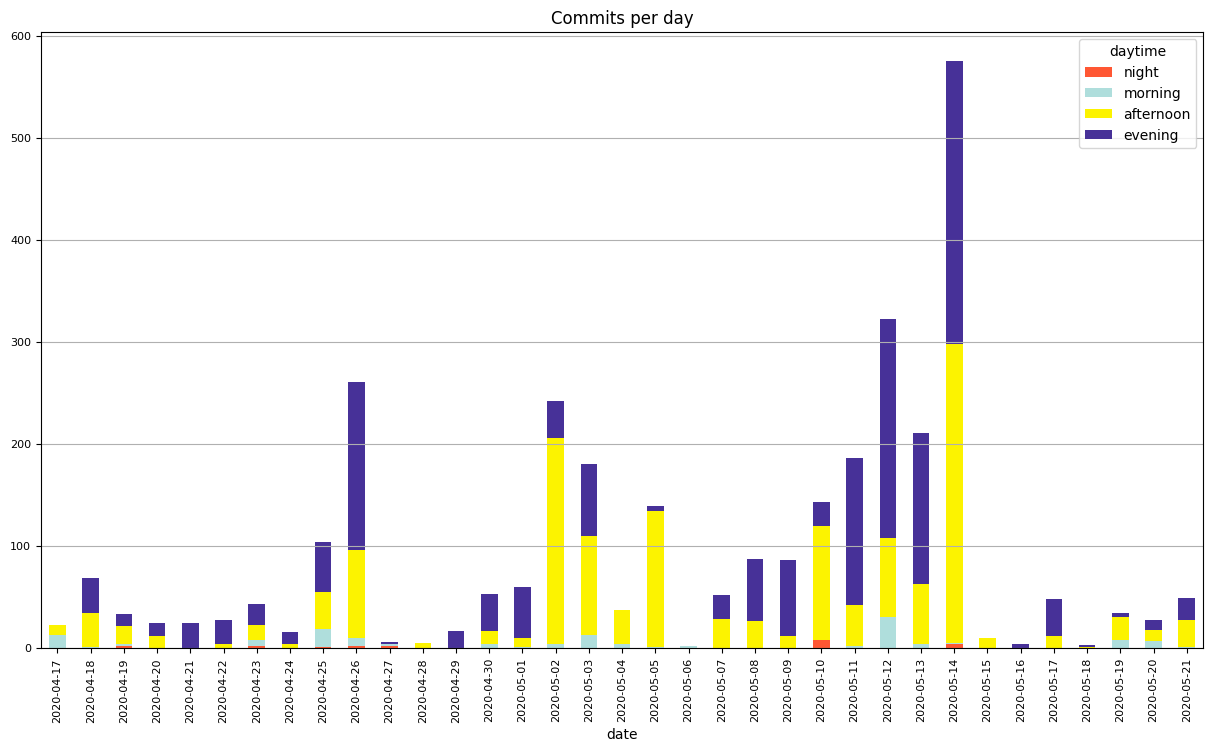

In [28]:
pl = data.plot(kind='bar', rot=90, fontsize=8, figsize=(15,8), title='Commits per day', stacked=True, color=['#FF5733', '#AFDEDC', '#FCF300', '#473198']).grid(axis='y')

In [29]:
con.close()

## • at the end of your Jupyter Notebook, create a markdown cell and insert the questions:

◦ “When do our users usually commit the labs: in the night, morning, afternoon, or evening?”, the answer is the two most common periods.

evening, afternoon

◦ Which day has:
∗ the most number of commits
∗ and at the same time, the number of commits in the evening is higher than in the afternoon?
The answer is the date of that day.

2020-05-12